<a href="https://colab.research.google.com/github/Aanisha/ML-experiments/blob/main/Vaccinations_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone "https://github.com/owid/covid-19-data.git"

Cloning into 'covid-19-data'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 69796 (delta 2), reused 4 (delta 2), pack-reused 69786
Receiving objects: 100% (69796/69796), 8.48 GiB | 33.29 MiB/s, done.
Resolving deltas: 100% (53028/53028), done.
Checking out files: 100% (737/737), done.


In [3]:
#Importing the packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
manufacturer = pd.read_csv("/content/covid-19-data/public/data/vaccinations/vaccinations-by-manufacturer.csv")

In [5]:
manufacturer

,location,date,vaccine,total_vaccinations
0,Chile,2020-12-24,Pfizer/BioNTech,420
1,Chile,2020-12-25,Pfizer/BioNTech,5199
2,Chile,2020-12-26,Pfizer/BioNTech,8339
3,Chile,2020-12-27,Pfizer/BioNTech,8650
4,Chile,2020-12-28,Pfizer/BioNTech,8650
...,...,...,...,...
777,United States,2021-02-14,Pfizer/BioNTech,27271797
778,United States,2021-02-16,Moderna,26738383
779,United States,2021-02-16,Pfizer/BioNTech,28374410
780,United States,2021-02-17,Moderna,27287041


In [6]:
manufacturer['location'].unique()

array(['Chile', 'Czechia', 'Germany', 'Iceland', 'Italy', 'Latvia',
       'Lithuania', 'United States'], dtype=object)

In [8]:
len(manufacturer['date'].unique())

56

In [ ]:
manufacturer['vaccine'].unique()

array(['Pfizer/BioNTech', 'Sinovac', 'Moderna', 'Oxford/AstraZeneca'],
      dtype=object)

In [11]:
vaccine_p = manufacturer[manufacturer.vaccine == 'Pfizer/BioNTech']
vaccine_m = manufacturer[manufacturer.vaccine == 'Moderna']
vaccine_s = manufacturer[manufacturer.vaccine == 'Sinovac']
vaccine_o = manufacturer[manufacturer.vaccine == 'Oxford/AstraZeneca']

vaccinations = []
vaccinations.append(vaccine_p.sum()['total_vaccinations'])
vaccinations.append(vaccine_s.sum()['total_vaccinations'])
vaccinations.append(vaccine_m.sum()['total_vaccinations'])
vaccinations.append(vaccine_o.sum()['total_vaccinations'])


In [12]:
vaccinations

[732195614, 16500276, 475728062, 538912]

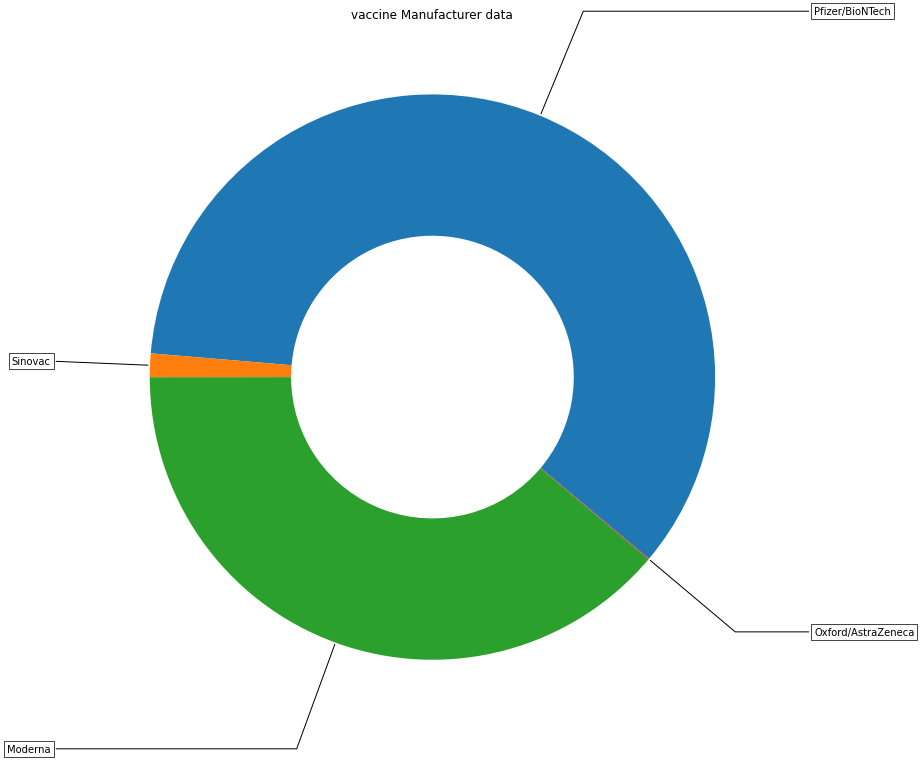

In [58]:
fig, ax = plt.subplots(figsize=(16, 13), subplot_kw=dict(aspect="equal"))



wedges, texts = ax.pie(vaccinations, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(manufacturer['vaccine'].unique()[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("vaccine Manufacturer data")

plt.show()




In [16]:
locations = pd.read_csv("/content/covid-19-data/public/data/vaccinations/locations.csv")

In [17]:
locations

,location,iso_code,vaccines,last_observation_date,source_name,source_website
0,Albania,ALB,Pfizer/BioNTech,2021-02-17,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Algeria,DZA,Sputnik V,2021-01-30,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Andorra,AND,Pfizer/BioNTech,2021-02-12,Government of Andorra,https://www.govern.ad/comunicats/item/12423-el...
3,Anguilla,AIA,Oxford/AstraZeneca,2021-02-13,Ministry of Health,https://www.facebook.com/MinistryofHealthAngui...
4,Argentina,ARG,Sputnik V,2021-02-17,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
...,...,...,...,...,...,...
89,Turks and Caicos Islands,TCA,Pfizer/BioNTech,2021-02-08,Ministry of Health,https://www.facebook.com/tcihealthpromotions/p...
90,United Arab Emirates,ARE,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",2021-02-17,National Emergency Crisis and Disaster Managem...,http://covid19.ncema.gov.ae/en
91,United Kingdom,GBR,"Oxford/AstraZeneca, Pfizer/BioNTech",2021-02-16,Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
92,United States,USA,"Moderna, Pfizer/BioNTech",2021-02-17,Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


In [18]:
locations['vaccines'].unique()

array(['Pfizer/BioNTech', 'Sputnik V', 'Oxford/AstraZeneca',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinovac', 'Sinopharm/Beijing',
       'Moderna, Pfizer/BioNTech', 'Pfizer/BioNTech, Sinovac',
       'Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinovac',
       'Oxford/AstraZeneca, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V',
       'Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V'],
      dtype=object)

In [27]:
Italy_data = locations[locations.location == 'Italy']

In [28]:
Italy_data

,location,iso_code,vaccines,last_observation_date,source_name,source_website
47,Italy,ITA,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",2021-02-17,Extraordinary commissioner for the Covid-19 em...,https://github.com/italia/covid19-opendata-vac...


In [29]:
Italy_Vaccinations = pd.read_csv("/content/covid-19-data/public/data/vaccinations/country_data/Italy.csv")

In [33]:
Italy_Vaccinations

,location,date,vaccine,source_url,total_vaccinations,people_vaccinated,people_fully_vaccinated
0,Italy,2020-12-27,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,7014,7014,0
1,Italy,2020-12-28,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,7986,7986,0
2,Italy,2020-12-29,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,8913,8913,0
3,Italy,2020-12-30,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,13581,13581,0
4,Italy,2020-12-31,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,38838,38838,0
5,Italy,2021-01-01,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,49875,49875,0
6,Italy,2021-01-02,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,88361,88361,0
7,Italy,2021-01-03,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,123464,123464,0
8,Italy,2021-01-04,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,191774,191774,0
9,Italy,2021-01-05,Pfizer/BioNTech,https://github.com/italia/covid19-opendata-vac...,271156,271156,0


In [32]:
len(Italy_Vaccinations['date'])

53

In [36]:
Italy_Total_Vaccinations = []
Italy_Total_Vaccinations.append(Italy_Vaccinations['total_vaccinations'][0])
for i in range(1,(len(Italy_Vaccinations['date']))):
  Italy_Total_Vaccinations.append(abs(Italy_Vaccinations['total_vaccinations'][i]-Italy_Vaccinations['total_vaccinations'][i-1]))

In [38]:
Italy_ppl_vaccinated = []
Italy_ppl_vaccinated.append(Italy_Vaccinations['people_vaccinated'][0])
for i in range(1,(len(Italy_Vaccinations['date']))):
  Italy_ppl_vaccinated.append(abs(Italy_Vaccinations['people_vaccinated'][i]-Italy_Vaccinations['people_vaccinated'][i-1]))

In [42]:
Italy_ppl = []
Italy_ppl.append(Italy_Vaccinations['people_fully_vaccinated'][0])
for i in range(1,(len(Italy_Vaccinations['date']))):
  Italy_ppl.append(abs(Italy_Vaccinations['people_fully_vaccinated'][i]-Italy_Vaccinations['people_fully_vaccinated'][i-1]))

In [45]:
Italy_daily = pd.DataFrame(list(zip(Italy_Vaccinations['date'], Italy_Total_Vaccinations , Italy_ppl_vaccinated, Italy_ppl)),
              columns=['Date','Total_Vaccinations', 'People_Vaccinated','People_fully_vaccinated'])

In [46]:
Italy_daily

,Date,Total_Vaccinations,People_Vaccinated,People_fully_vaccinated
0,2020-12-27,7014,7014,0
1,2020-12-28,972,972,0
2,2020-12-29,927,927,0
3,2020-12-30,4668,4668,0
4,2020-12-31,25257,25257,0
5,2021-01-01,11037,11037,0
6,2021-01-02,38486,38486,0
7,2021-01-03,35103,35103,0
8,2021-01-04,68310,68310,0
9,2021-01-05,79382,79382,0


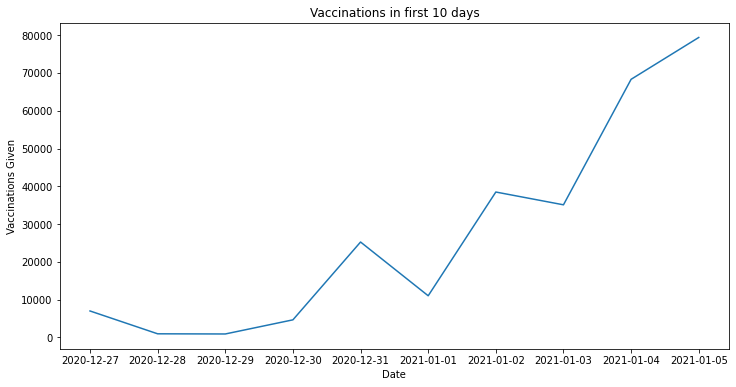

In [54]:
f, ax = plt.subplots(figsize=(12,6))

plt.plot(Italy_daily['Date'][0:10],Italy_daily['Total_Vaccinations'][0:10]) 
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given")  # add Y-axis label 
plt.title("Vaccinations in first 10 days")  # add title 
plt.show() 

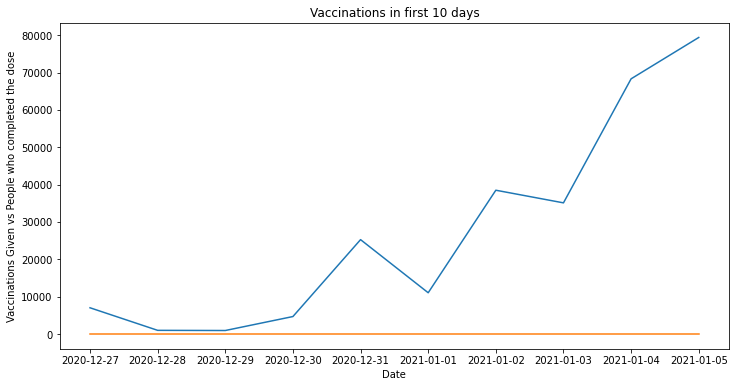

In [53]:
f, ax = plt.subplots(figsize=(12,6))

plt.plot(Italy_daily['Date'][0:10],Italy_daily['Total_Vaccinations'][0:10]) 
plt.plot(Italy_daily['Date'][0:10],Italy_daily['People_fully_vaccinated'][0:10]) 
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given vs People who completed the dose")  # add Y-axis label 
plt.title("Vaccinations in first 10 days")  # add title 
plt.show() 

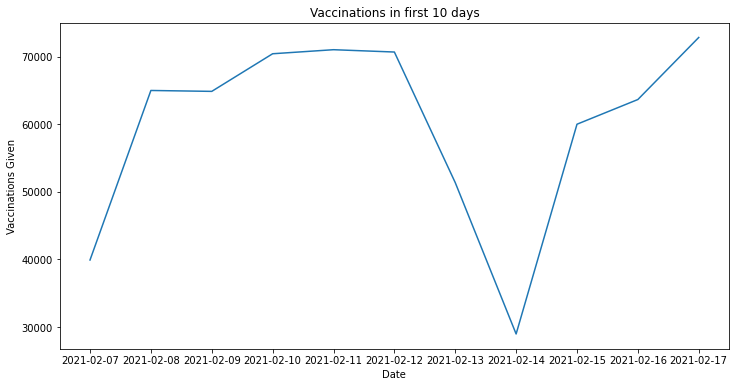

In [55]:
f, ax = plt.subplots(figsize=(12,6))

plt.plot(Italy_daily['Date'][42:],Italy_daily['Total_Vaccinations'][42:]) 
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given")  # add Y-axis label 
plt.title("Vaccinations in last 10 days")  # add title 
plt.show() 

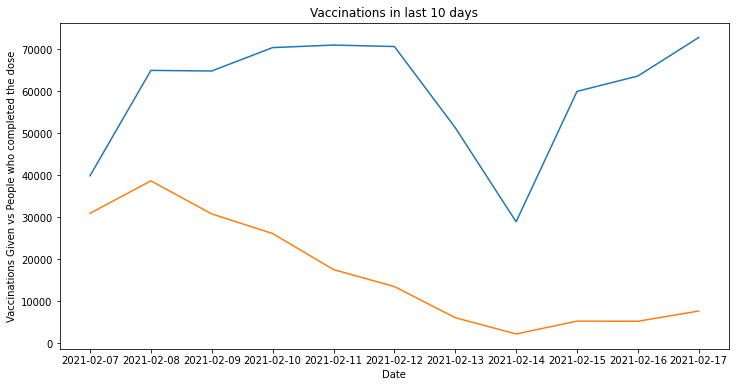

In [57]:
f, ax = plt.subplots(figsize=(12,6))

plt.plot(Italy_daily['Date'][42:],Italy_daily['Total_Vaccinations'][42:]) 
plt.plot(Italy_daily['Date'][42:],Italy_daily['People_fully_vaccinated'][42:]) 
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given vs People who completed the dose")  # add Y-axis label 
plt.title("Vaccinations in last 10 days")  # add title 
plt.show() 

In [39]:
world_csv = pd.read_csv("/content/covid-19-data/public/data/vaccinations/vaccinations.csv")

In [40]:
world_csv

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3511,World,OWID_WRL,2021-02-13,172095053.0,88289272.0,27007321.0,5238975.0,6133754.0,2.21,1.13,0.35,787.0
3512,World,OWID_WRL,2021-02-14,175791992.0,90906366.0,28451276.0,3696939.0,6166648.0,2.26,1.17,0.37,791.0
3513,World,OWID_WRL,2021-02-15,178854108.0,92440331.0,28973018.0,3062116.0,6134568.0,2.29,1.19,0.37,787.0
3514,World,OWID_WRL,2021-02-16,184585643.0,95939068.0,30520294.0,5731535.0,5133179.0,2.37,1.23,0.39,659.0


In [59]:
world = world_csv[world_csv.iso_code == 'OWID_WRL']

In [60]:
world

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3449,World,OWID_WRL,2020-12-13,86215.0,86215.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
3450,World,OWID_WRL,2020-12-14,NaN,NaN,NaN,NaN,764250.0,NaN,NaN,NaN,98.0
3451,World,OWID_WRL,2020-12-15,1614715.0,114715.0,NaN,NaN,764250.0,0.02,0.00,NaN,98.0
3452,World,OWID_WRL,2020-12-16,NaN,NaN,NaN,NaN,509505.0,NaN,NaN,NaN,65.0
3453,World,OWID_WRL,2020-12-17,NaN,NaN,NaN,NaN,382132.0,NaN,NaN,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3511,World,OWID_WRL,2021-02-13,172095053.0,88289272.0,27007321.0,5238975.0,6133754.0,2.21,1.13,0.35,787.0
3512,World,OWID_WRL,2021-02-14,175791992.0,90906366.0,28451276.0,3696939.0,6166648.0,2.26,1.17,0.37,791.0
3513,World,OWID_WRL,2021-02-15,178854108.0,92440331.0,28973018.0,3062116.0,6134568.0,2.29,1.19,0.37,787.0
3514,World,OWID_WRL,2021-02-16,184585643.0,95939068.0,30520294.0,5731535.0,5133179.0,2.37,1.23,0.39,659.0


In [65]:
world = world.fillna(0)

In [69]:
wtl = world['total_vaccinations']

In [74]:
wtl[3449]

86215.0

In [75]:
World_Total_Vaccinations = []
World_Total_Vaccinations.append(world['total_vaccinations'][3449])
for i in range(1,(len(world['date']))):
  World_Total_Vaccinations.append(abs(world['total_vaccinations'][3449+i]-world['total_vaccinations'][3449+i-1]))

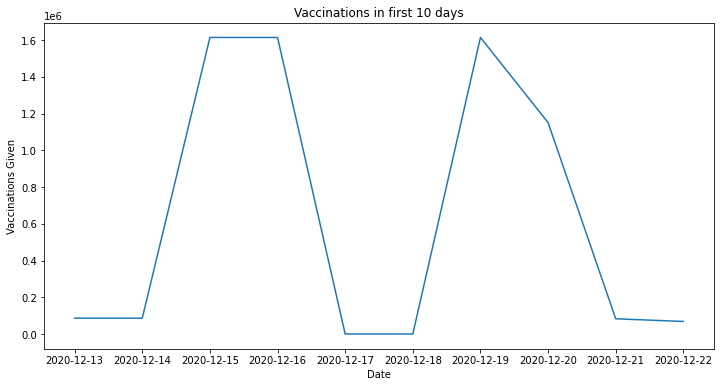

In [81]:
f, ax = plt.subplots(figsize=(12,6))

plt.plot(world['date'][0:10],World_Total_Vaccinations[0:10]) 
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given")  # add Y-axis label 
plt.title("Vaccinations in first 10 days")  # add title 
plt.show() 

In [82]:
World_ppl = []
World_ppl.append(world['people_fully_vaccinated'][3449])
for i in range(1,(len(world['date']))):
  World_ppl.append(abs(world['people_fully_vaccinated'][3449+i]-world['people_fully_vaccinated'][3449+i-1]))

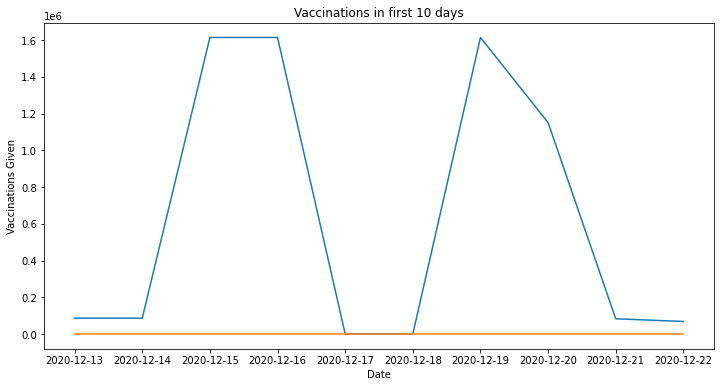

In [83]:
f, ax = plt.subplots(figsize=(12,6))

plt.plot(world['date'][0:10],World_Total_Vaccinations[0:10]) 
plt.plot(world['date'][0:10],World_ppl[0:10])
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given")  # add Y-axis label 
plt.title("Vaccinations in first 10 days")  # add title 
plt.show() 

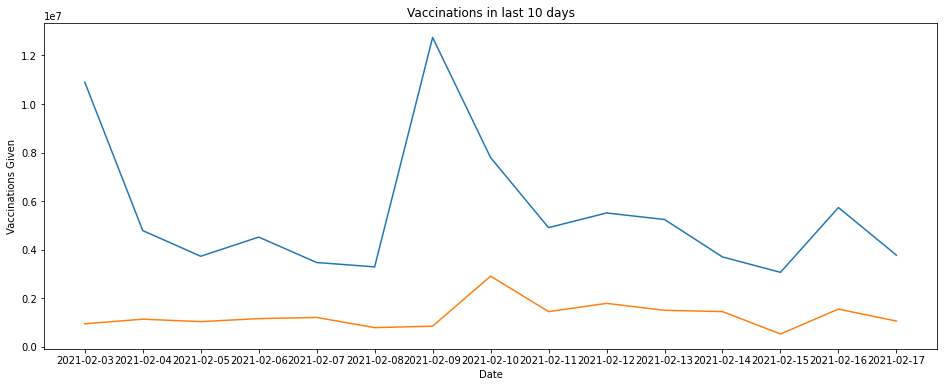

In [88]:
f, ax = plt.subplots(figsize=(16,6))

plt.plot(world['date'][52:],World_Total_Vaccinations[52:]) 
plt.plot(world['date'][52:],World_ppl[52:])
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given")  # add Y-axis label 
plt.title("Vaccinations in last 10 days")  # add title 
plt.show() 

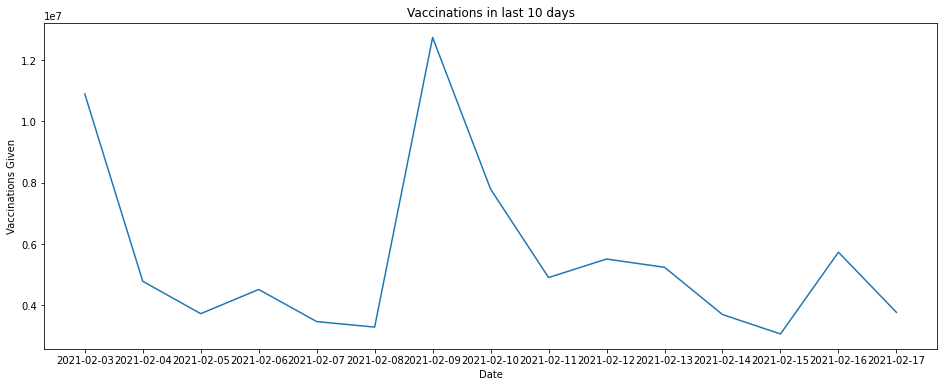

In [89]:
f, ax = plt.subplots(figsize=(16,6))

plt.plot(world['date'][52:],World_Total_Vaccinations[52:]) 
#plt.plot(world['date'][52:],World_ppl[52:])
plt.xlabel("Date")  # add X-axis label 
plt.ylabel("Vaccinations Given")  # add Y-axis label 
plt.title("Vaccinations in last 10 days")  # add title 
plt.show() 